# Hotel Booking Cancallation Prediction

# **Load Data**
Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.




In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

# Display the first few rows to get an overview
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1. Data Pre-processing (30%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

In [19]:
# Drop the irrelevant columns
columns_to_drop = ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'babies',
                   'assigned_room_type', 'agent', 'company', 'days_in_waiting_list', 'reservation_status',
                   'reservation_status_date']
df.drop(columns=columns_to_drop, inplace=True)

# Verify the remaining columns
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')


## 1.1 Missing Values

Identify and handled missing values.

In [20]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values
print(missing_values[missing_values > 0])

# Handle missing values by dropping rows with missing data
df.dropna(inplace=True)


children      4
country     488
dtype: int64


## 1.2 Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

In [21]:
# Get unique values in specified columns
unique_values = {
    'hotel': df['hotel'].unique(),
    'meal': df['meal'].unique(),
    'country': df['country'].unique(),
    'market_segment': df['market_segment'].unique(),
    'customer_type': df['customer_type'].unique()
}

# Display unique values
for key, value in unique_values.items():
    print(f'{key}: {value}\n')


hotel: ['Resort Hotel' 'City Hotel']

meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']

country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP'
 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 

## 1.3 Removing Inconsistent values

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'



In [22]:
# Removing bookings with zero adults, babies, or children
df = df[(df['adults'] > 0) | (df['children'] > 0) ]

# Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights'
df = df[~((df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0))]


# 2. Exploratory Data Analysis (15%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.
* Identifying the most common customer types.

Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts

hotel
City Hotel      41.897083
Resort Hotel    28.225662
Name: is_canceled, dtype: float64
meal
BB           91279
HB           14355
SC           10501
Undefined     1156
FB             797
Name: count, dtype: int64
Number of returning guests: 3496
reserved_room_type
A    85010
D    19068
E     6444
F     2872
G     2063
B     1106
C      922
H      597
L        6
Name: count, dtype: int64


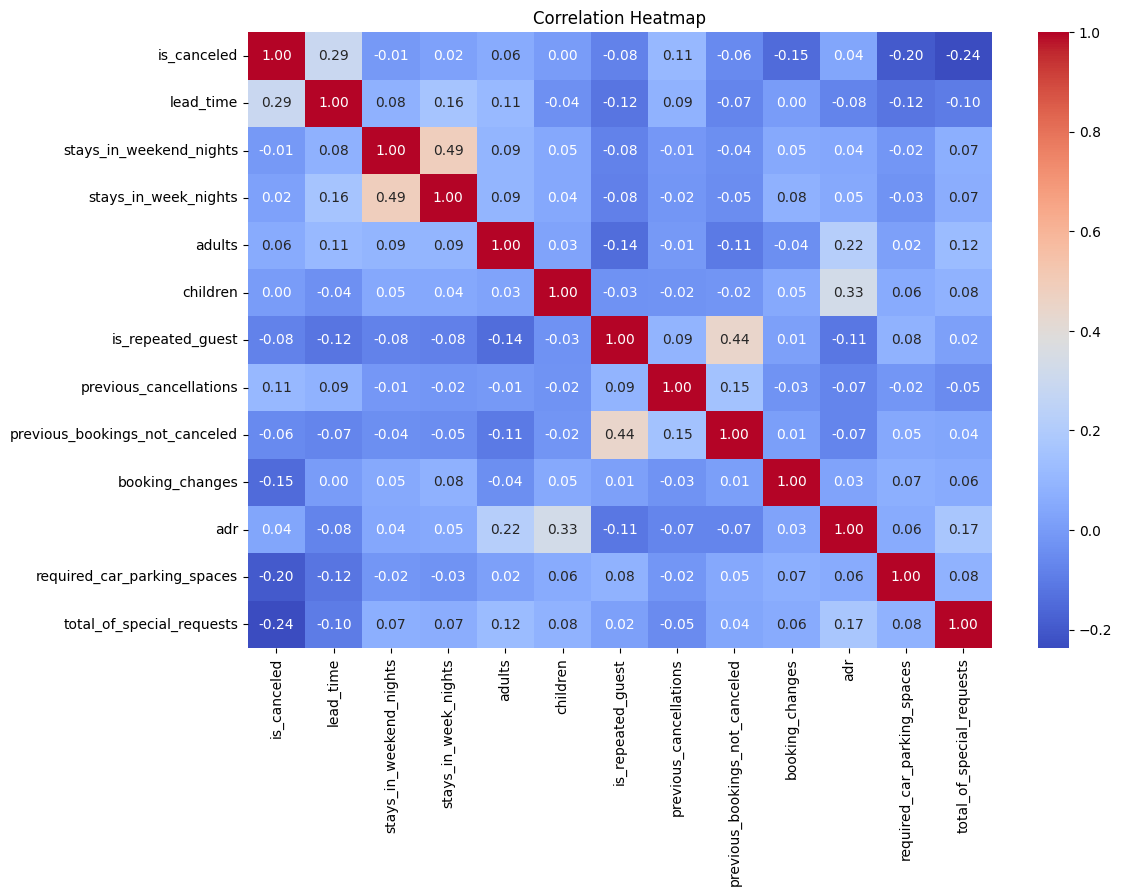

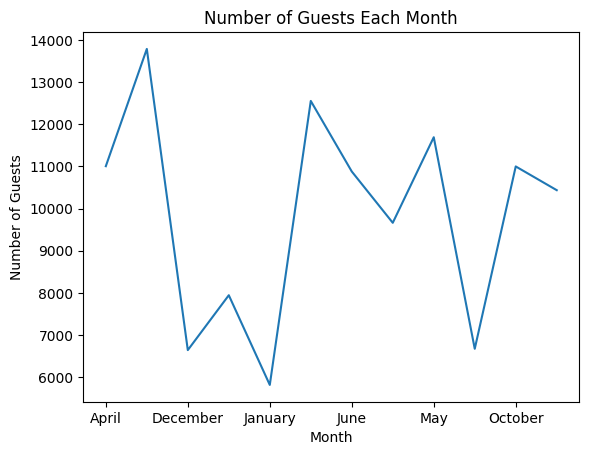

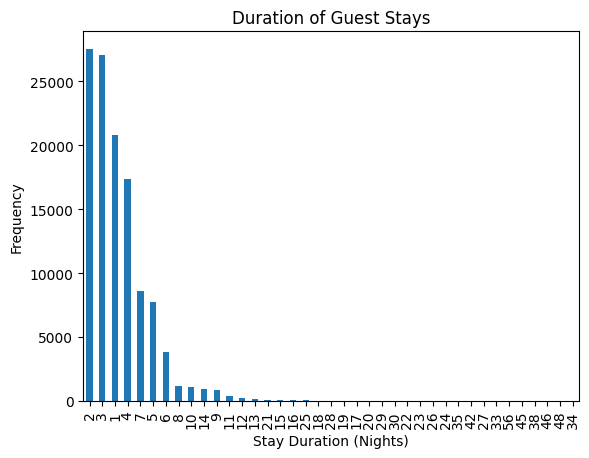

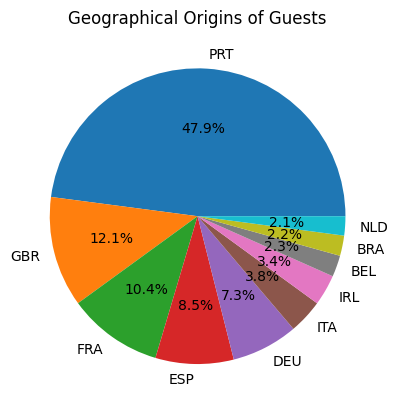

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate cancellation percentages for City and Resort hotels
cancellation_rates = df.groupby('hotel')['is_canceled'].mean() * 100
print(cancellation_rates)

# Most frequently ordered meal types
meal_counts = df['meal'].value_counts()
print(meal_counts)

# Number of returning guests
returning_guests = df['is_repeated_guest'].sum()
print(f'Number of returning guests: {returning_guests}')

# Most booked room types
room_type_counts = df['reserved_room_type'].value_counts()
print(room_type_counts)
# Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Line graph for number of guests each month
monthly_guests = df.groupby('arrival_date_month')['adults'].count()
monthly_guests.plot(kind='line')
plt.title('Number of Guests Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Guests')
plt.show()

# Bar graph for the duration of guest stays
stay_duration = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
stay_duration.value_counts().plot(kind='bar')
plt.title('Duration of Guest Stays')
plt.xlabel('Stay Duration (Nights)')
plt.ylabel('Frequency')
plt.show()

# Pie chart for guests' geographical origins
country_counts = df['country'].value_counts().head(10)  # Top 10 countries
country_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Geographical Origins of Guests')
plt.ylabel('')
plt.show()


# 3. Feature Engineering (25%)


---





Apply various feature engineering techniques, covered in the lectures and practicles.

Hint:

* Binning
* Encoding
* **Outlier identification and handling**
* Variance, Covariance, Correlation, Correlation Heapmap
* Scaling

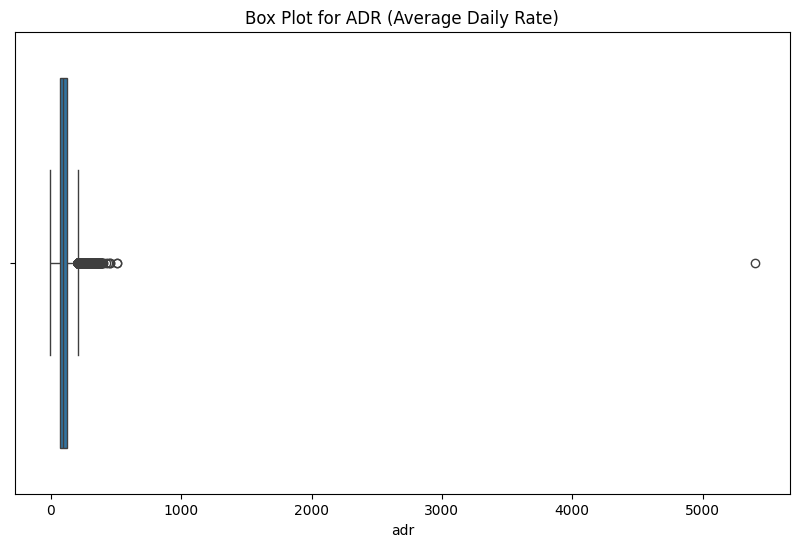

In [24]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Binning the 'lead_time' column
bins = [0, 30, 60, 90, 120, 150, 180]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180']
df['lead_time_binned'] = pd.cut(df['lead_time'], bins=bins, labels=labels)

# One-hot encoding categorical columns
df = pd.get_dummies(df, columns=['meal', 'country', 'market_segment', 'customer_type'], drop_first=True)

# Plotting a box plot for ADR (Average Daily Rate)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['adr'])
plt.title('Box Plot for ADR (Average Daily Rate)')
plt.show()

# Standardizing the 'lead_time' and 'adr' columns
scaler = StandardScaler()
df[['lead_time', 'adr']] = scaler.fit_transform(df[['lead_time', 'adr']])


# 4. Classifier Training (20%)


---


Utilize the sklearn Python library to train a decision tree classifier. Your process should start with splitting your dataset into predictor features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train and test your data on the original dataset, a normalized dataset, and a standardized dataset. Aim to achieve a decision tree classifier with at least 70% accuracy.

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ensure 'lead_time_binned' is part of your dataframe
bins = [0, 30, 60, 90, 120, 150, 180]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180']
df['lead_time_binned'] = pd.cut(df['lead_time'], bins=bins, labels=labels)

# Separate features and target variable
X = df.drop('is_canceled', axis=1)  # Features
y = df['is_canceled']  # Target variable

# Identify categorical columns including lead_time_binned
categorical_cols = X.select_dtypes(include=['object']).columns.tolist() + ['lead_time_binned']

# Create a ColumnTransformer for one-hot encoding of categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Apply one-hot encoding to categorical features
    ],
    remainder='passthrough'  # Leave other columns unchanged
)

# Create a pipeline that first transforms the data and then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the model
model.fit(X_train, y_train)

# Make predictions and check accuracy
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 83.80%


# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

Accuracy: 0.7704
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82     22171
           1       0.70      0.68      0.69     13256

    accuracy                           0.77     35427
   macro avg       0.75      0.75      0.75     35427
weighted avg       0.77      0.77      0.77     35427



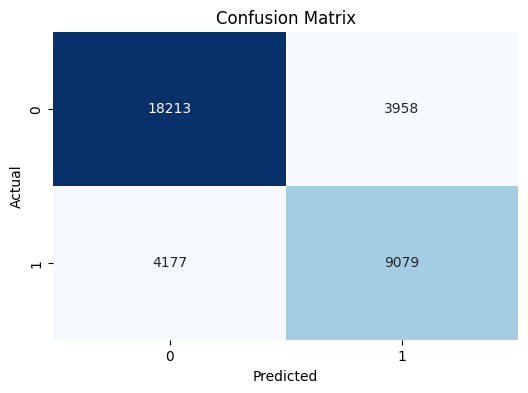

In [29]:
# Necessary imports
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features (X) and target variable (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Define categorical and numerical columns
categorical_cols = ['hotel', 'distribution_channel', 'reserved_room_type', 'deposit_type']
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'adr']

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Define the model pipeline with a DecisionTreeClassifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model pipeline
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



